In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [9]:
customers_head = customers.head()
print(customers_head)

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [14]:
products_head = products.head()
print(products_head)

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [16]:
transactions_head = transactions.head()
print(transactions_head)

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [18]:
customers_missing = customers.isnull().sum()
products_missing = products.isnull().sum()
transactions_missing = transactions.isnull().sum()

In [22]:
print(customers_missing)

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [24]:
transactions_description = transactions.describe()

customers_head, products_head, transactions_head, customers_missing, products_missing, transactions_missing, transactions_description

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

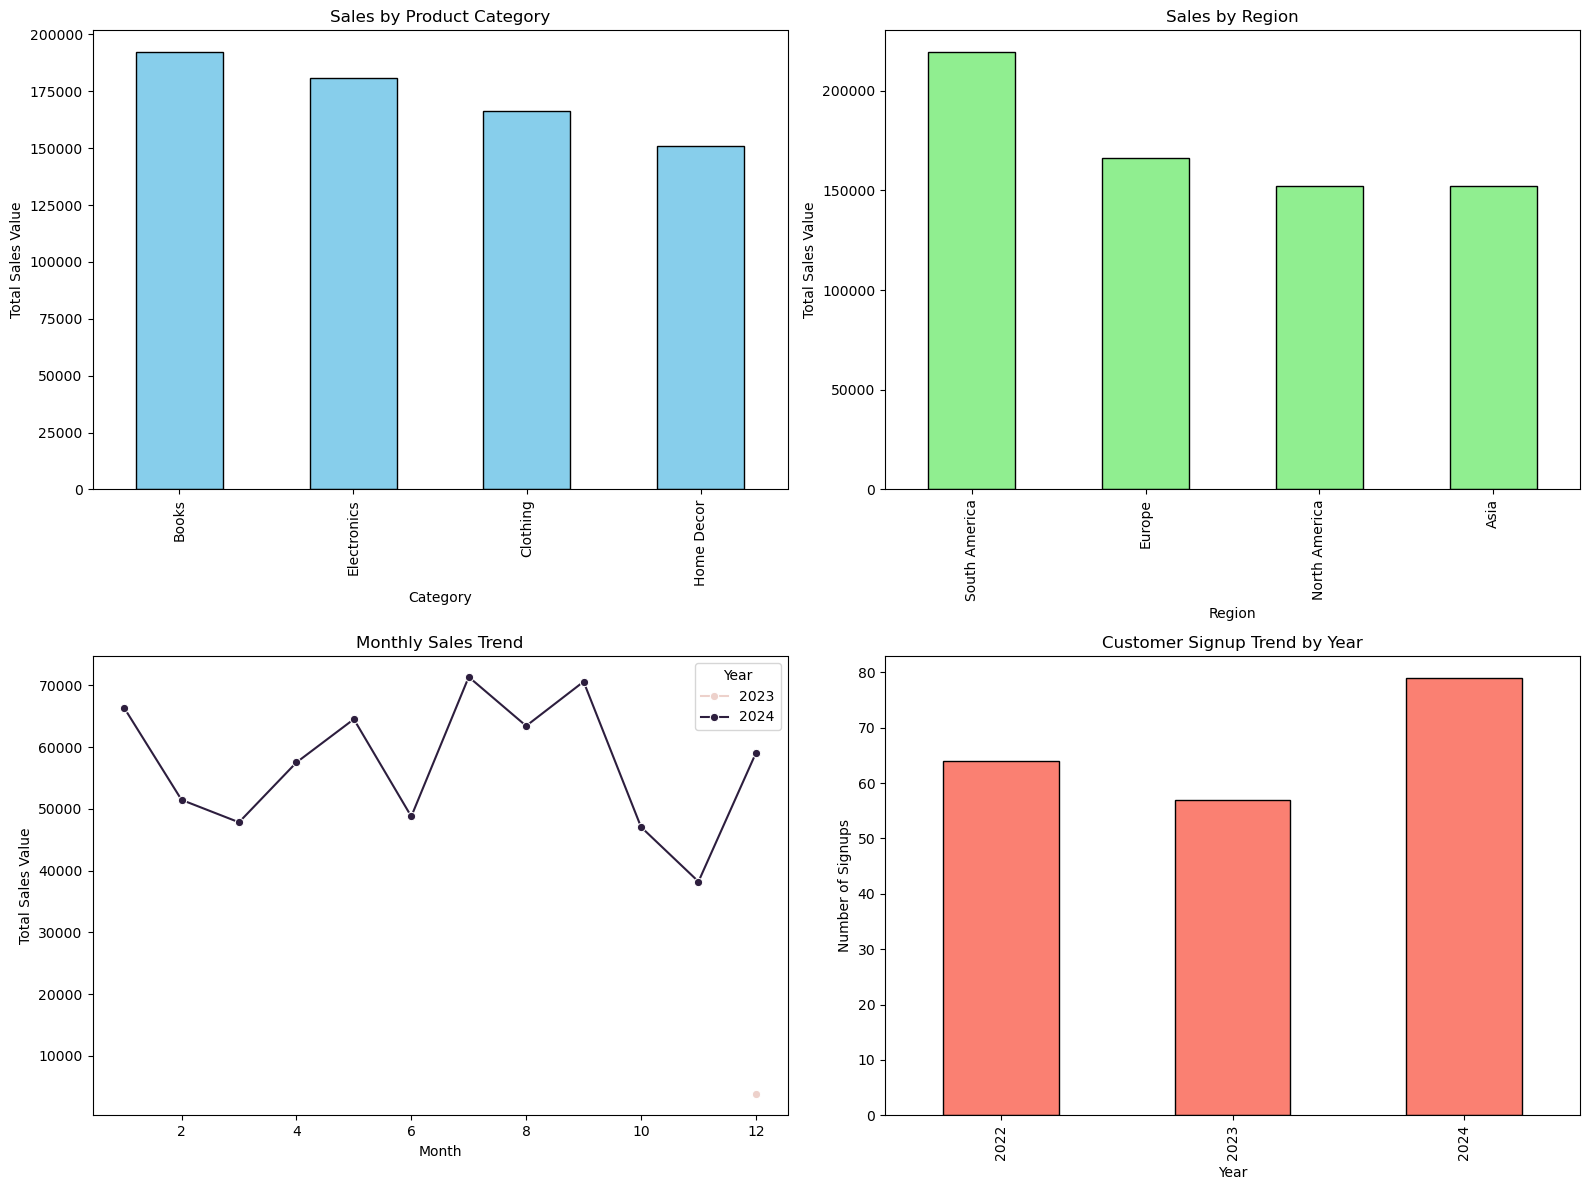

(Category
 Books          192147.47
 Electronics    180783.50
 Clothing       166170.66
 Home Decor     150893.93
 Name: TotalValue, dtype: float64,
 Region
 South America    219352.56
 Europe           166254.63
 North America    152313.40
 Asia             152074.97
 Name: TotalValue, dtype: float64,
    Year  Month  TotalValue
 0  2023     12     3769.52
 1  2024      1    66376.39
 2  2024      2    51459.27
 3  2024      3    47828.73
 4  2024      4    57519.06,
 SignupDate
 2022    64
 2023    57
 2024    79
 Name: count, dtype: int64)

In [42]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Add month and year columns to transactions for trend analysis
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Year'] = transactions['TransactionDate'].dt.year

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Sales by product category
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Sales by region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Monthly sales trend
monthly_sales = merged_data.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()

# Customer signup trend by year
signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()

# Plotting the trends and insights
plt.figure(figsize=(16, 12))

# Sales by category
plt.subplot(2, 2, 1)
sales_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales by Product Category')
plt.ylabel('Total Sales Value')
plt.xlabel('Category')

# Sales by region
plt.subplot(2, 2, 2)
sales_by_region.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Sales by Region')
plt.ylabel('Total Sales Value')
plt.xlabel('Region')

# Monthly sales trend
plt.subplot(2, 2, 3)
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales Value')
plt.xlabel('Month')

# Customer signup trend by year
plt.subplot(2, 2, 4)
signup_trend.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Customer Signup Trend by Year')
plt.ylabel('Number of Signups')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

sales_by_category, sales_by_region, monthly_sales.head(), signup_trend


## Key Insights

Sales by Product Category:

       Top-performing categories:
         Books: $192,147
         Electronics: $180,784
         Clothing: $166,171
         Home Decor: $150,894
         
# Sales by Region:

      Highest sales:
        South America: $219,353
    Europe: $166,255
        North America: $152,313
    Asia: $152,075
        
# Monthly Sales Trends:
 Sales peak during January 2024, reaching approximately $66,376.
 Steady decline in sales from February to April 2024.

# Customer Signup Trends:
2024 saw the highest customer signups: 79 users.
Growth observed year-on-year since 2022.

# Overall Observations:
Seasonal peaks suggest potential promotional periods.
South America drives most sales; focus on expanding offerings here.